# Coffee Production Prediction
AIM: The purpose of this notebook is to demonstrate the steps involved in Data Science process to some students.
This is a sample of a real dataset. This dataset was choosen instead of the usual house price prediction that is normally used for regression problems.


## 1. IMPORTING LIBRARIES AND CONFIGURATIONS

In [39]:
%matplotlib inline 

In [40]:
import numpy as np

In [41]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
sns.set()

## 2. READING IN THE DATA

In [42]:
# Read in CSV File into a Dataframe
df = pd.read_csv('JHM_JBM98_17_2.csv')

In [43]:
# Preview the dataset
df.head()

,Altitude (m),Elevation range,Producing Districts per Main Group,Head Count to Main Groups (2004),Head Count to Main Groups (2012),Change in Group size (2012 minus 2004),2009/10,2010/11,2011/12,Average
0,198,Low,8,68,63,-5,1170.5,660.7,182.8,671.3
1,198,Low,10,174,390,216,2104.8,1539.0,909.8,1517.8
2,200,Low,23,213,318,105,1268.3,1276.5,1415.5,1320.1
3,209,Low,7,149,140,-9,649.2,326.3,102.3,359.2
4,237,Low,10,105,306,201,2516.8,1988.5,2787.3,2430.8


## 3. EXPLORATORY DATA ANALYSIS

In [44]:
# Check if there are any empty values
# If I had null values, I would then have to decide if I want to drop them (using df.dropna()) or, if I can enter a value from giving it an average or
# using domain expertise to put in a likely value
df.isnull().any()

Altitude (m)                              False
Elevation range                           False
Producing Districts per Main Group        False
Head Count to Main Groups (2004)          False
Head Count to Main Groups (2012)          False
Change in Group size (2012 minus 2004)    False
2009/10                                   False
2010/11                                   False
2011/12                                   False
Average                                   False
dtype: bool

In [45]:
#Check the Shape of the dataset
df.shape

(63, 10)

So based on the features we can start by doing he following. 
- We can use one hot encoding for the Elevation range(We do not have a lot of different categories so this works well for us) so that we can use numbers to represent the categories.
- Since the head counts are for 2004 and 2012, we will drop those
- Since we have the final average which will correlated to the production for each year, we can drop those and focus on the average production for the three years
- We can also get rid of the change in Group size

In [46]:
#Insted of dropping the columns, I can keep what I am interested in. This might be a little quicker to do
df=df[['Altitude (m)','Elevation range','Producing Districts per Main Group','Average']]



In [47]:
#Look at data again
df.head(20)

,Altitude (m),Elevation range,Producing Districts per Main Group,Average
0,198,Low,8,671.3
1,198,Low,10,1517.8
2,200,Low,23,1320.1
3,209,Low,7,359.2
4,237,Low,10,2430.8
5,237,Low,3,7.2
6,266,Low,1,352.3
7,302,Low,5,3335.2
8,335,Low,9,937.8
9,351,Low,6,7135.2


In [48]:
#Get some basic statistics of the features I am interested in
# I will ofcourse only see calculations for numerical columns
df.describe()

,Altitude (m),Producing Districts per Main Group,Average
count,63.000000,63.000000,63.000000
mean,531.984127,5.857143,3523.128571
std,293.041310,4.560904,4058.979565
min,73.000000,1.000000,0.000000
25%,301.500000,2.000000,911.250000
50%,505.000000,5.000000,1948.500000
75%,783.000000,8.000000,4916.550000
max,1274.000000,23.000000,19757.000000


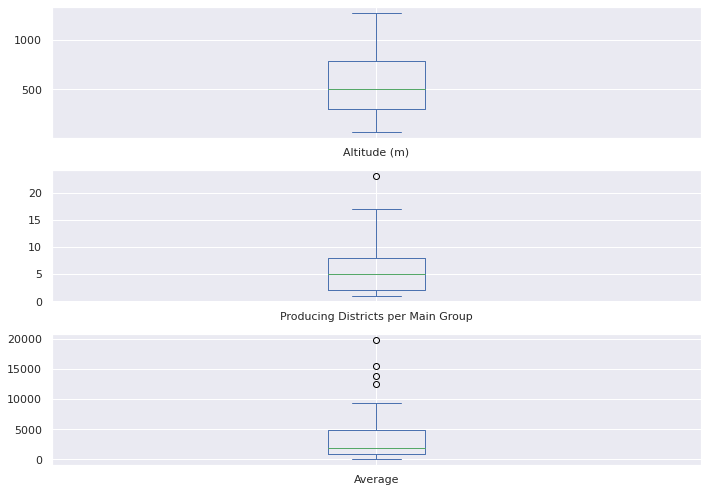

In [49]:
# box and whisker plots to get a clear picture and see if there are outliers
sns.set(rc={'figure.figsize':(10.0,7.0)})
df.plot(kind='box', subplots=True, layout=(3,1), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

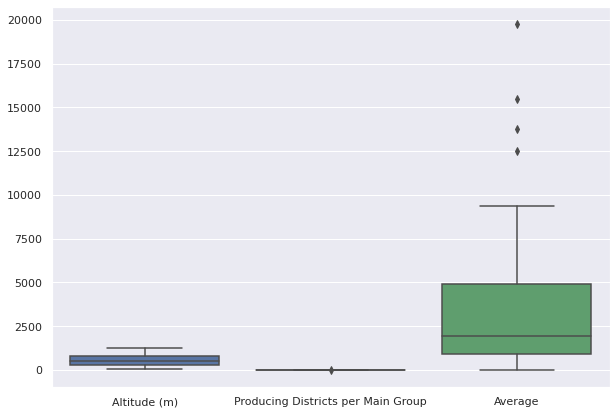

In [50]:
#boxplots using seaborn
#sns.set(rc={'figure.figsize':(10.0,7.0)})
ax = sns.boxplot(data=df)

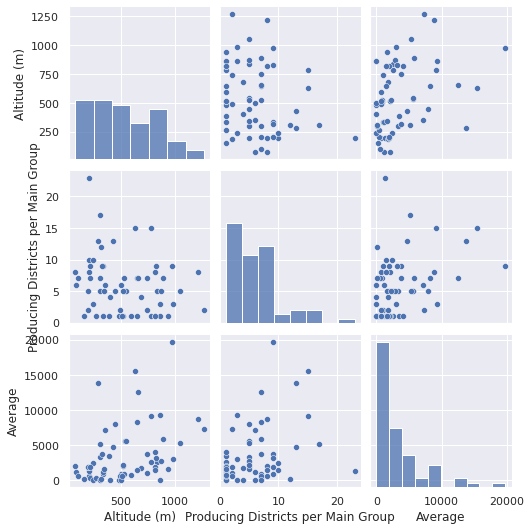

In [51]:
#visualization uing a pairplot
#I can observe some behavioural patterns and some seem random.
#There seem to be a relationship with average and altitude (looks linear).
#I can't say the same for altitude and producing districts
sns.pairplot(data=df)

## 3. Prepare Features and Machine Learning Models

In [52]:
#Performing one hot encoding of Elevation Range. 
#Note that the return is a dataframe
#As good practice I will add a prefix to the column names
dummy_elevation = pd.get_dummies(df['Elevation range'], prefix='Elevation_')
dummy_elevation.head()

,Elevation__High,Elevation__Low,Elevation__Mid
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [53]:
#We now need to merge/concat the orginal with this dataframe
#We will have the original dataframe on the left and use the index of both as the join key
#This should match up the dataframes

df = pd.merge(
    left=df,
    right=dummy_elevation,
    left_index=True,
    right_index=True,
)
df.head()


,Altitude (m),Elevation range,Producing Districts per Main Group,Average,Elevation__High,Elevation__Low,Elevation__Mid
0,198,Low,8,671.3,0,1,0
1,198,Low,10,1517.8,0,1,0
2,200,Low,23,1320.1,0,1,0
3,209,Low,7,359.2,0,1,0
4,237,Low,10,2430.8,0,1,0


In [54]:
#I will now drop the Elevation range column
df = df.drop(columns = ['Elevation range']) 
df.head()

,Altitude (m),Producing Districts per Main Group,Average,Elevation__High,Elevation__Low,Elevation__Mid
0,198,8,671.3,0,1,0
1,198,10,1517.8,0,1,0
2,200,23,1320.1,0,1,0
3,209,7,359.2,0,1,0
4,237,10,2430.8,0,1,0


In [55]:
# Separation of label from our features
X = df.drop(columns = ['Average'])
y = df['Average']


In [56]:
#check x and y
X
#y

,Altitude (m),Producing Districts per Main Group,Elevation__High,Elevation__Low,Elevation__Mid
0,198,8,0,1,0
1,198,10,0,1,0
2,200,23,0,1,0
3,209,7,0,1,0
4,237,10,0,1,0
...,...,...,...,...,...
58,938,1,1,0,0
59,980,9,1,0,0
60,981,3,1,0,0
61,1050,5,1,0,0


In [57]:
#I will now scale these values.
#NB: I have the Average in the middle but we will drop it soon, so we don't have to worry about it
# 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Observe that the scaler.fit_transform takes numpy array as argument
df_scaled = scaler.fit_transform(X.to_numpy())
# We then need to trasform back 
df_scaled = pd.DataFrame(df_scaled, columns=['Altitude (m)','Producing Districts per Main Group', 'Elevation__High','Elevation__Low','Elevation__Mid'])
df_scaled.head()

,Altitude (m),Producing Districts per Main Group,Elevation__High,Elevation__Low,Elevation__Mid
0,0.104080,0.318182,0.0,1.0,0.0
1,0.104080,0.409091,0.0,1.0,0.0
2,0.105745,1.000000,0.0,1.0,0.0
3,0.113239,0.272727,0.0,1.0,0.0
4,0.136553,0.409091,0.0,1.0,0.0


## 4. Modeling

In [58]:
#Split the data into testing and training
#convert to arrays for models
X = np.array(df_scaled) 
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [59]:
y_train

array([6.69700e+02, 4.69810e+03, 7.95500e+03, 9.89900e+02, 1.32010e+03,
       5.81830e+03, 1.92900e+02, 4.57000e+01, 5.62680e+03, 9.34030e+03,
       1.83470e+03, 1.94850e+03, 5.13500e+03, 1.28800e+02, 1.64020e+03,
       2.61090e+03, 1.86430e+03, 0.00000e+00, 3.79750e+03, 7.13520e+03,
       3.52300e+02, 1.51780e+03, 9.37800e+02, 2.05830e+03, 1.24030e+03,
       1.55920e+03, 6.84300e+02, 1.43090e+03, 3.04550e+03, 4.30000e+00,
       8.79910e+03, 3.81620e+03, 0.00000e+00, 9.26800e+02, 2.60990e+03,
       9.14480e+03, 0.00000e+00, 6.17700e+02, 3.52210e+03, 3.59200e+02,
       5.25330e+03, 1.75600e+03, 7.26100e+02, 1.37929e+04, 3.12020e+03,
       8.26890e+03, 7.20000e+00, 1.25301e+04, 3.33520e+03, 1.97570e+04])

In [60]:
#import models

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [61]:
#Store the model objects in an array so we can process them in a loop
models = []

models.append(('LR', LinearRegression()))
models.append(('LGBMR', XGBRegressor()))
models.append(('SGD', SGDRegressor()))
models.append(('KR', KernelRidge()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))

In [62]:
#The model_selection utility provides  a way how I can score and compare our models
from sklearn import model_selection

In [63]:
#I need a structure to store our results and our model names. I will use a dictionary for this
#I also make use of a random_state value to ensure I can repeat our test with the same results
#The smaller the Mean Squared Error, the closer the fit is to the data.
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #print ('MSE: %2.3f' % mse)
    return mse

def my_scorer():
    return make_scorer(MSE, greater_is_better=False) # change to true if using something like R2


results={}
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=7, shuffle=True)
    score_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=my_scorer()) 
    #neg_mean_squared_error for scoring is very confusing, but the MSE is the positive version of the result.
    #As a result I wrote my own scorer
    results[name] = abs(score_results.mean()) #I calculated the absolute value of result
    
for key, value in results.items():
    print("%s => %f " % (key,value))

# Sort the results
dict(sorted(results.items(), key=lambda item: item[1]))
  

LR => 14792778.634092 
LGBMR => 30389624.503019 
SGD => 14484732.290261 
KR => 14349613.933233 
GBR => 24705437.750485 
SVR => 19307578.674022 


{'KR': 14349613.933233494,
 'SGD': 14484732.29026102,
 'LR': 14792778.634092111,
 'SVR': 19307578.674022447,
 'GBR': 24705437.750485,
 'LGBMR': 30389624.50301913}

## 5. Parameter Tuning using GridSearch

In [64]:
#I can use GridSearchCV to build a grid and see what would be the best combination parameters for kernel ridge  since
# it gave use the highest score
from sklearn.model_selection import GridSearchCV

tuned_parameters = {
    'alpha': [1.0, 2.0,2.5,1.5],
    'kernel': ['linear', 'sigmoid','rbf','poly'],
    'gamma':[None, 1, 0.1], 
    'degree':[1,2,3],
    'coef0':[0.0, 0.1, 0.5]
}

kr_model = KernelRidge()
gridSearch = GridSearchCV(kr_model, tuned_parameters, cv=10, scoring=my_scorer())
gridSearch.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=KernelRidge(),
             param_grid={'alpha': [1.0, 2.0, 2.5, 1.5],
                         'coef0': [0.0, 0.1, 0.5], 'degree': [1, 2, 3],
                         'gamma': [None, 1, 0.1],
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             scoring=make_scorer(MSE, greater_is_better=False))

In [65]:
#I can then look at the best score from the result
gridSearch.best_score_

-14948823.683719177

In [66]:
#I can also look at the best parameters
gridSearch.best_params_

{'alpha': 1.5, 'coef0': 0.0, 'degree': 1, 'gamma': 1, 'kernel': 'sigmoid'}

In [67]:
#I will now select the best estimator(model with the best parameters) and store the model
kr = gridSearch.best_estimator_

In [68]:
#Training the model on the best estimator
kr.fit(X_train, y_train)

KernelRidge(alpha=1.5, coef0=0.0, degree=1, gamma=1, kernel='sigmoid')

## 6. Predict with Test Values

In [69]:
Y_Predict = kr.predict(X_test)

In [70]:
#This is such a big score. Pretty bad performance for the best model that we have.

MSE(y_test, Y_Predict)

10428420.770399392

Text(0.5, 1.0, 'True Average vs Predicted Average: $Y_i$ vs $\\hat{Y}_i$')

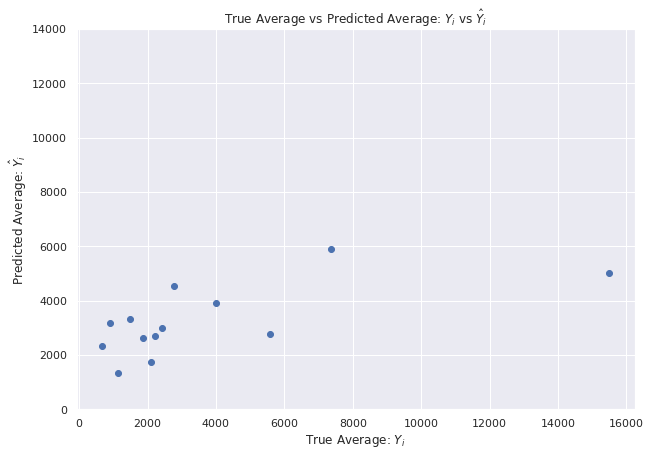

In [73]:
#The scatter plot should create a linear line if the model is performing well

plt.scatter(y_test, Y_Predict)
plt.xlabel("True Average: $Y_i$")
plt.ylabel("Predicted Average: $\hat{Y}_i$")
plt.yticks( range(0,16000,2000) )
plt.title("True Average vs Predicted Average: $Y_i$ vs $\hat{Y}_i$")

### Using residual plot to visualize errors in Data. The data should be scattered around line zero

Text(0, 0.5, 'Residuals')

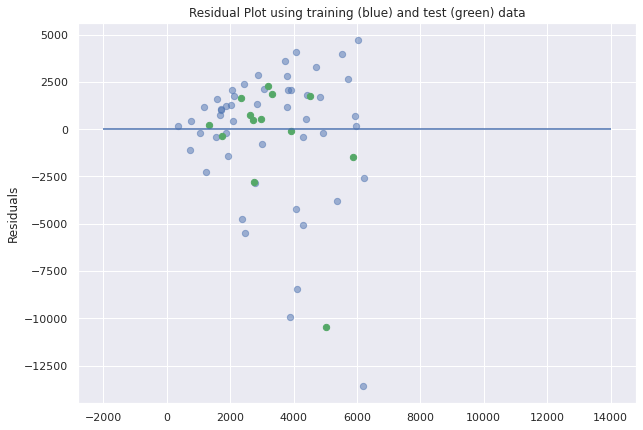

In [72]:
plt.scatter(kr.predict(X_train),kr.predict(X_train) - y_train,c='b',s=40, alpha=0.5)
plt.scatter(kr.predict(X_test), kr.predict(X_test) - y_test, c='g',s=40)
plt.hlines(y=0, xmin=-2000, xmax=14000)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

## 7. Conclusion

The above shows that we are way off with our prediction. Based on the data, I think I need more data to be able to get meaningful results.